<a href="https://colab.research.google.com/github/redashu/ML2020b2udaipurGJ/blob/master/opensourcePOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import  pandas  as  pd
import  time
from  sklearn.preprocessing  import  StandardScaler
from   sklearn.tree  import  DecisionTreeClassifier
from  sklearn.neighbors  import  KNeighborsClassifier
from  sklearn.ensemble  import  RandomForestClassifier
from  sklearn.metrics  import  accuracy_score
from  sklearn.preprocessing  import  LabelEncoder
import  matplotlib.pyplot  as  plt
from  sklearn.model_selection  import  train_test_split

In [21]:
#  takding sample data from Aws URL and that is by UCI 
df=pd.read_csv('http://3.92.235.245/datasets/Social_Network_Ads.csv')
#  converting  CSV  into  dataframe 
type(df)


pandas.core.frame.DataFrame

In [0]:
#  taking  features only by  converting  dataframe into numpy 
features=df.iloc[:,[1,2,3]].values
label=df.iloc[:,-1].values
#type(features)

In [0]:
#  Here we are converting  str to numbers
# calling  labelEncoder
enc=LabelEncoder()

In [0]:
# now  transforming 
features[:,0]=enc.fit_transform(features[:,0])

In [0]:
#  spliting  data into training and testing
tr_data,ts_data,tr_label,ts_label=train_test_split(features,label,test_size=0.1)


In [0]:
#  feature  scalling method call  
sc=StandardScaler()

In [0]:
#  transforming  featuresn for training  data
tr_data_trns=sc.fit_transform(tr_data)

In [0]:
#  transforming  features for testing  data
ts_data_trns=sc.transform(ts_data)

In [0]:
#  lets call all classifier
des_clf=DecisionTreeClassifier()  #  default is CART with GINI
knn_clf=KNeighborsClassifier()   #  value of  K is  5 
random_clf=RandomForestClassifier()  #  no of  Trees are  10 

In [0]:
# now training  all Classifiers
trained_des=des_clf.fit(tr_data_trns,tr_label)
trained_knn=knn_clf.fit(tr_data_trns,tr_label)
trained_random=random_clf.fit(tr_data_trns,tr_label)


In [0]:
#  now time for Predicting output 
des_predict=trained_des.predict(ts_data_trns)
knn_predict=trained_knn.predict(ts_data_trns)
random_predict=trained_random.predict(ts_data_trns)

In [0]:
#  check accuracy for all 3 algos
acc_des=accuracy_score(ts_label,des_predict)
acc_knn=accuracy_score(ts_label,knn_predict)
acc_random=accuracy_score(ts_label,random_predict)

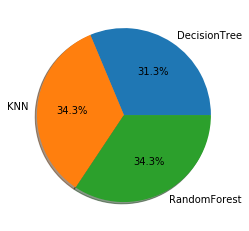

In [34]:
#  now finally have a visual look
algo=['DecisionTree','KNN','RandomForest']
score=[acc_des,acc_knn,acc_random]
plt.pie(score,labels=algo,autopct='%1.1f%%',shadow=True)
plt.show()